In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:/Users/ADMIN/Documents/Automobile-Insurance-claims-prediction/insurance_claims.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#Checking the values of the last column
df['_c39'].unique()

array([nan])

In [4]:
#Deleting the last column 
df = df.drop('_c39', axis=1)

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [7]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [8]:
#Checking for null values 
df.isnull().sum()


months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [5]:
#Handling missing values (filling the null values with the mode)
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [10]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
df['incident_hour_of_the_day'].value_counts()

incident_hour_of_the_day
17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: count, dtype: int64

## Explolatory data analysis

### 1. Univariate EDA 

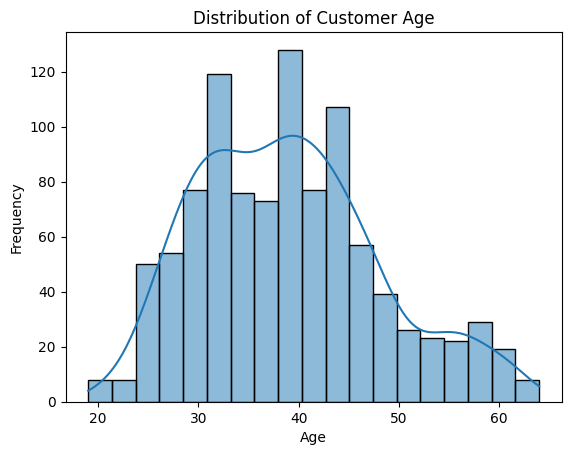

In [14]:
## Distribution of Customer Age
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [15]:
#Most customers are aged between ages 25- 50. 
# it has a longer tail to the right, it’s right-skewed (many older customers with fewer younger ones).

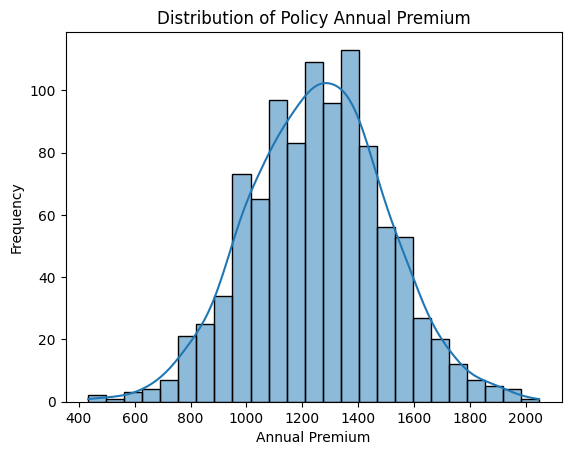

In [16]:
# Distribution of Policy Annual Premium
sns.histplot(df['policy_annual_premium'], kde=True)
plt.title('Distribution of Policy Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()


In [17]:
#Annual policy premium is normally distributed  

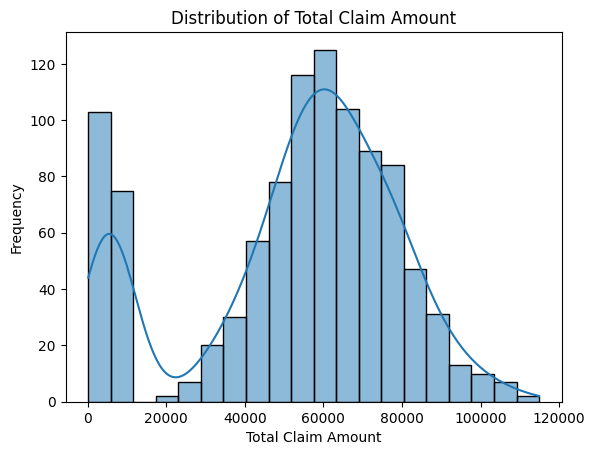

In [76]:
#Distribution of total claim amount
sns.histplot(df['total_claim_amount'], kde=True)
plt.title('Distribution of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()



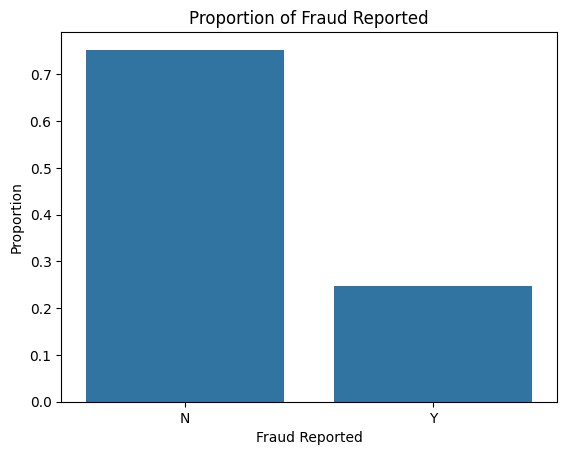

In [18]:
#Proportion of fraud_reported
fraud_counts = df['fraud_reported'].value_counts(normalize=True)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Proportion of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Proportion')
plt.show()



In [ ]:
#Most of the reported cases are non-fradulent 
#This causes class imbalance 

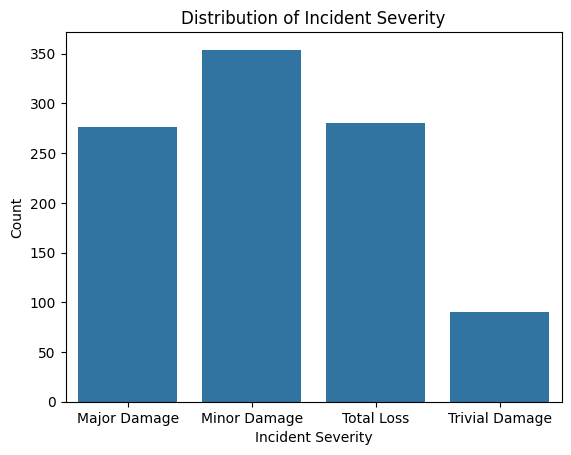

In [19]:
#Distribution of incident_severity
sns.countplot(x='incident_severity', data=df)
plt.title('Distribution of Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.show()



In [ ]:
#As seen on the graph above most accidents are minor car damages

## 2. Multivariate EDA

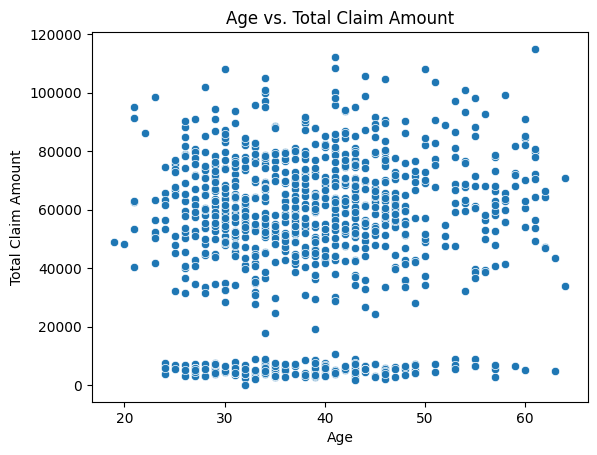

In [20]:
#age vs. total_claim_amount
sns.scatterplot(x='age', y='total_claim_amount', data=df)
plt.title('Age vs. Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()



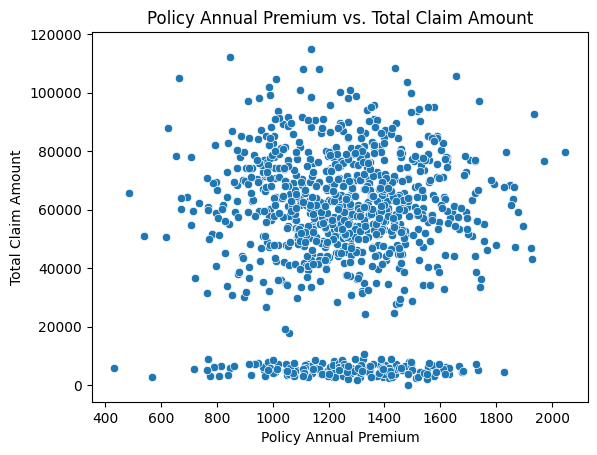

In [21]:
#policy_annual_premium vs. total_claim_amount
sns.scatterplot(x='policy_annual_premium', y='total_claim_amount', data=df)
plt.title('Policy Annual Premium vs. Total Claim Amount')
plt.xlabel('Policy Annual Premium')
plt.ylabel('Total Claim Amount')
plt.show()


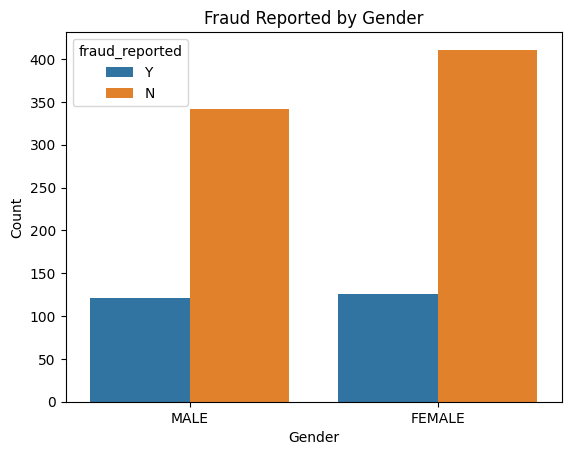

In [22]:
#insured_sex vs. fraud_reported
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)
plt.title('Fraud Reported by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



In [23]:
#Most of the fradulent claims were made by females. 

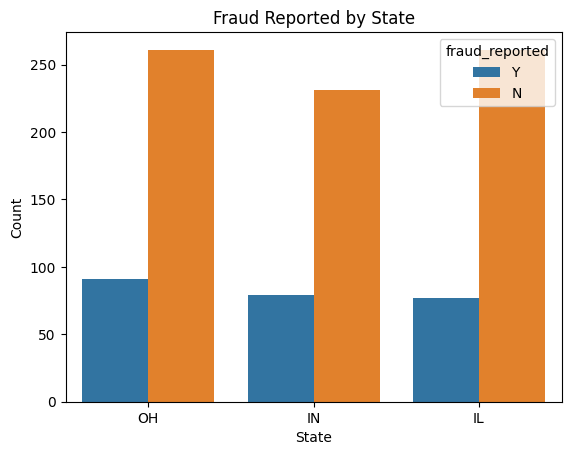

In [88]:
#policy_state vs. fraud_reported
sns.countplot(x='policy_state', hue='fraud_reported', data=df)
plt.title('Fraud Reported by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


In [ ]:
#Most of the fradulent claims were reported in ohio and the least fraudulent cases in indiana

<Axes: xlabel='incident_state', ylabel='count'>

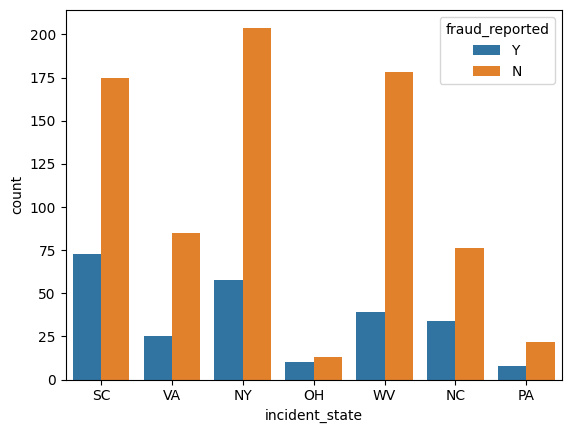

In [24]:
#incident state vs. fraud_reported
sns.countplot(x ='incident_state', data = df, hue = 'fraud_reported')

<Axes: xlabel='insured_education_level', ylabel='count'>

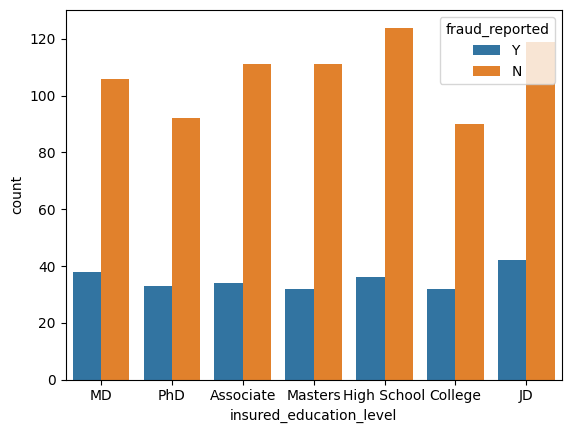

In [69]:
#insured_education_level vs. fraud_reported
sns.countplot(x ='insured_education_level', data = df, hue = 'fraud_reported')

In [ ]:
# most fraud claims were made by Juris Doctors (Doctor of Law) and least fraud claims made by collage graduates.

<Axes: xlabel='incident_type', ylabel='count'>

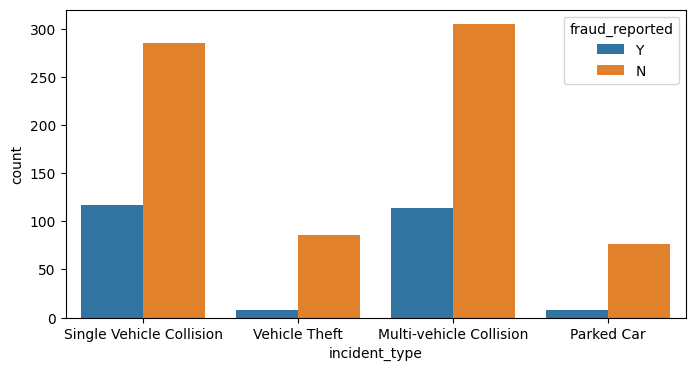

In [25]:
#incident type vs fraud reported
plt.figure(figsize = (8,4))
sns.countplot(x ='incident_type', data = df, hue = 'fraud_reported')

In [ ]:
# Most of the fraud claims were made by people involved in single vehicle collision and the least fraud claims by peple involved in vehicle theft incidents.

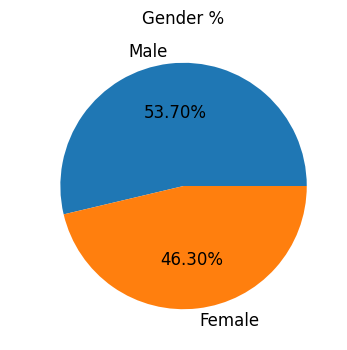

In [26]:
#distribution of insured sex
fig = plt.figure(figsize=(6,4))
ax = (df['insured_sex'].value_counts()*100/len(df))\
.plot.pie(autopct = '%.2f%%', labels= ['Male','Female'], fontsize = 12)
ax.set_title('Gender %')
ax.set(ylabel = ' ')
plt.show()

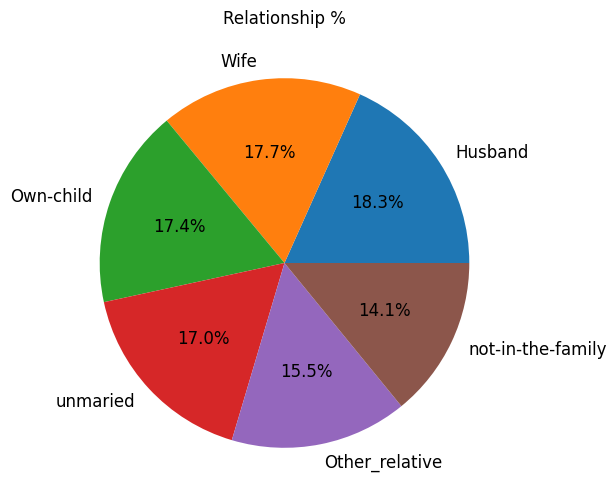

In [27]:
#distribution of the relationship of the insured
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100/len(df))\
.plot.pie(autopct = '%.1f%%', labels= ['Husband','Wife', 'Own-child', 'unmaried', 'Other_relative', 'not-in-the-family'], fontsize = 12)
ax.set_title('Relationship %')
ax.set(ylabel = ' ')
plt.show()

## Model Training 

In [8]:
# Data encoding
# Select categorical columns (those with object data type)
cat_df = df.select_dtypes(include=['object'])  
num_df = df.select_dtypes(exclude=['object']) 

# Apply LabelEncoder to categorical columns
 
label_encoder = LabelEncoder()

# Iterate over each column in the categorical dataframe and apply label encoding
for col in cat_df.columns:
    cat_df[col] = label_encoder.fit_transform(cat_df[col])

# Combine the numerical and encoded categorical dataframes back into one dataframe
df_encoded = pd.concat([num_df, cat_df], axis=1)

# Check the first few rows of the encoded dataframe
df_encoded.head()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,0,3,4,1,996,2,2,10,1,1
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,1,3,5,5,628,0,0,8,12,1
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,1,3,1,1,685,1,1,4,30,0
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,0,3,2,0,669,0,1,3,34,1
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,1,3,1,0,220,1,1,0,31,0


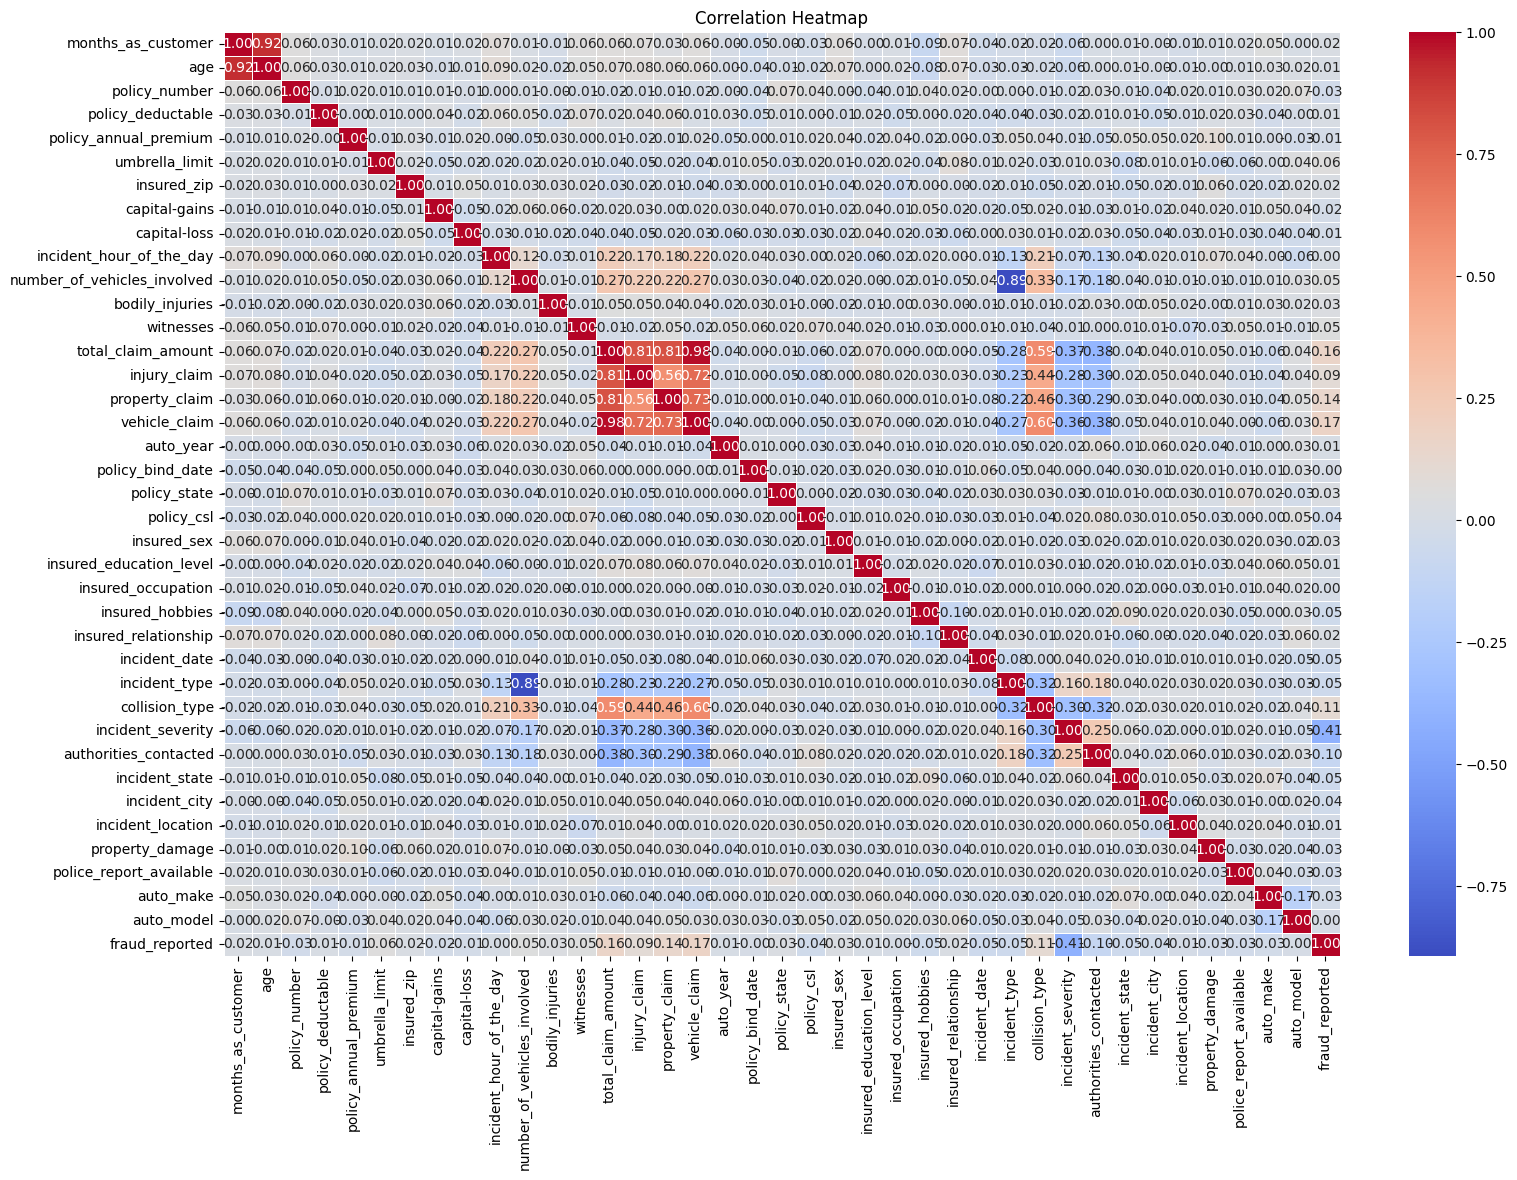

In [9]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# Draw the heatmap 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [37]:
# Calculate correlations between predictor variables and the response variable
corrs = df_encoded.corr()['fraud_reported'].sort_values(ascending=False)

In [38]:


# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'fraud_reported']

for col in column_titles:
    p_val = round(pearsonr(df_encoded[col], df_encoded['fraud_reported'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.05]

,Correlation_Coefficient,P_Value
vehicle_claim,0.170049,0.000000
incident_severity,-0.405988,0.000000
total_claim_amount,0.163651,0.000000
property_claim,0.137835,0.000012
collision_type,0.110130,0.000485
authorities_contacted,-0.099688,0.001598
injury_claim,0.090975,0.003986


In [39]:
# The dependent variable remains the same:
y = df_encoded['fraud_reported']  

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X = df_encoded[X_names]

In [40]:
X.head()

,vehicle_claim,total_claim_amount,property_claim,collision_type,injury_claim,authorities_contacted,incident_severity
0,52080,71610,13020,3,6510,3,0
1,3510,5070,780,0,780,3,1
2,23100,34650,3850,2,7700,3,1
3,50720,63400,6340,1,6340,3,0
4,4550,6500,650,0,1300,3,1


## Finding and removing the highly correlated features

In [17]:
# Create the correlation matrix
corr = X.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,vehicle_claim,total_claim_amount,property_claim,collision_type,injury_claim,authorities_contacted,incident_severity
vehicle_claim,1.000000,0.982773,NaN,NaN,NaN,NaN,NaN
total_claim_amount,0.982773,1.000000,NaN,NaN,NaN,NaN,NaN
property_claim,NaN,NaN,1.0,NaN,NaN,NaN,NaN
collision_type,NaN,NaN,NaN,1.0,NaN,NaN,NaN
injury_claim,NaN,NaN,NaN,NaN,1.0,NaN,NaN
authorities_contacted,NaN,NaN,NaN,NaN,NaN,1.0,NaN
incident_severity,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [41]:
X = X.drop('total_claim_amount', axis = 1)
X.head()

,vehicle_claim,property_claim,collision_type,injury_claim,authorities_contacted,incident_severity
0,52080,13020,3,6510,3,0
1,3510,780,0,780,3,1
2,23100,3850,2,7700,3,1
3,50720,6340,1,6340,3,0
4,4550,650,0,1300,3,1


In [42]:
#Splitting into train and test set 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,shuffle=False)

## Model training 
Models to be used: 
1. Suport Vector Classifier
2. KNN(K nearest neighbours)
3. Decision Tree classifier
4. Random forest classifier
5. Ada Boost Classifier
6. XgBoost Classifier
7. Voting classifier 

### Suport Vector Classifier

In [52]:


svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# accuracy_score, confusion_matrix and classification_report


svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.75
Test accuracy of Support Vector Classifier is : 0.76
[[228   0]
 [ 72   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       228
           1       0.00      0.00      0.00        72

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300



C:\Users\ADMIN\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### KNN(K nearest neighbours)

In [53]:


knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# accuracy_score, confusion_matrix and classification_report



knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.75
Test accuracy of KNN is : 0.76
[[228   0]
 [ 72   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       228
           1       0.00      0.00      0.00        72

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300



C:\Users\ADMIN\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\anaconda3\envs\sql_packages\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

### Decision Tree Classifier

In [54]:


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# accuracy_score, confusion_matrix and classification_report


dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.9985714285714286
Test accuracy of Decision Tree is : 0.7766666666666666
[[194  34]
 [ 33  39]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       228
           1       0.53      0.54      0.54        72

    accuracy                           0.78       300
   macro avg       0.69      0.70      0.70       300
weighted avg       0.78      0.78      0.78       300



In [55]:
#hyper parameter tuning


grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.7985714285714286


In [57]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report


dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8085714285714286
Test accuracy of Decision Tree is : 0.81
[[211  17]
 [ 40  32]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       228
           1       0.65      0.44      0.53        72

    accuracy                           0.81       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.80      0.81      0.80       300



### Random Forest Classifier

In [58]:


rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

# accuracy_score, confusion_matrix and classification_report



rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9314285714285714
Test accuracy of Random Forest is : 0.8233333333333334
[[211  17]
 [ 36  36]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       228
           1       0.68      0.50      0.58        72

    accuracy                           0.82       300
   macro avg       0.77      0.71      0.73       300
weighted avg       0.81      0.82      0.81       300



### Ada Boost Classifier

In [63]:


ada = AdaBoostClassifier(estimator=dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

# best estimator 

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 70}
0.7971428571428572
Training accuracy of Ada Boost is : 0.7928571428571428
Test accuracy of Ada Boost is : 0.8533333333333334
[[202  26]
 [ 18  54]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       228
           1       0.68      0.75      0.71        72

    accuracy                           0.85       300
   macro avg       0.80      0.82      0.81       300
weighted avg       0.86      0.85      0.86       300



### XgBoost Classifier

In [61]:


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)

# best estimator 

xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 991.0 kB/s eta 0:02:06
   ---------------------------------------- 0.1/124.9 MB 525.1 kB/s eta 0:03:58
   ---------------------------------------- 0.1/124.9 MB 871.5 kB/s eta 0:02:24
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.3/124.9 MB 1.5 MB/s eta 0:01:23
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:45
   ---------------------------------------- 0.5/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------

Training accuracy of XgBoost is : 0.9971428571428571
Test accuracy of XgBoost is : 0.7933333333333333
[[206  22]
 [ 40  32]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       228
           1       0.59      0.44      0.51        72

    accuracy                           0.79       300
   macro avg       0.71      0.67      0.69       300
weighted avg       0.78      0.79      0.78       300

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Training accuracy of XgBoost is : 0.8085714285714286
Test accuracy of XgBoost is : 0.8166666666666667
[[212  16]
 [ 39  33]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       228
           1       0.67      0.46      0.55        72

    accuracy                           0.82       300
   macro avg       0.76      0.69      0.72       300
weighted avg       0.80      0.82      0.80       300



### Voting Classifier

In [64]:


classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.8642857142857143
Test accuracy of Voting Classifier is : 0.8
[[213  15]
 [ 45  27]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       228
           1       0.64      0.38      0.47        72

    accuracy                           0.80       300
   macro avg       0.73      0.65      0.68       300
weighted avg       0.78      0.80      0.78       300



## Model Comaprison 

In [65]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc,  xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Ada Boost,0.853333
3,Random Forest,0.823333
5,XgBoost,0.816667
2,Decision Tree,0.810000
6,Voting Classifier,0.800000
0,SVC,0.760000
1,KNN,0.760000


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9468\3957521413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Model', data=models, palette='Blues_d')


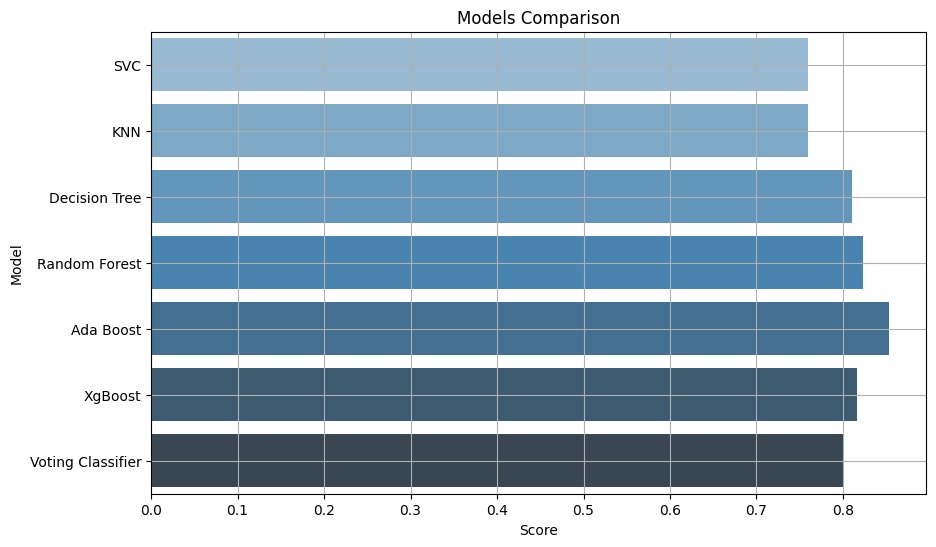

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=models, palette='Blues_d')
plt.title('Models Comparison')
plt.grid(True)
plt.show()